# 코퍼스 분석(EDA)  
    -구조 분석  
        -네이버 영화 리뷰 코퍼스(NSMC)를 분석.  
        -데이터 특성 분석: 리뷰 텍스트의 길이 분포(최대, 최소, 평균) 확인.  
        -긍정/부정 레이블의 분포(balance)를 시각화하여 확인.  
    -내용 분석  
        1. 단어 빈도 분석  
        2. 형태소 분석 (샘플 데이터)  
        3. 특수문자 및 기호 분석  
        4. N-gram 분석 (Bigram)  

In [1]:
# 1) 데이터 준비와 확인

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split


In [3]:
# 데이터(네이버 영화 리뷰)) 준비 및 확인

#운영 체제 독립성과 가독성 및 유지 보수 편의성을 위한 코드 개선 
data_path = os.path.join(os.getenv("HOME"), 'work', 'workplace', 'AIFFEL_quest_rs', 'Exploration', 'Quest05', 'sentiment_classification', 'data')
train_data = pd.read_table(os.path.join(data_path, 'ratings_train.txt'))
test_data = pd.read_table(os.path.join(data_path, 'ratings_test.txt'))

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


리뷰 길이 최댓값: 146
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 35.20


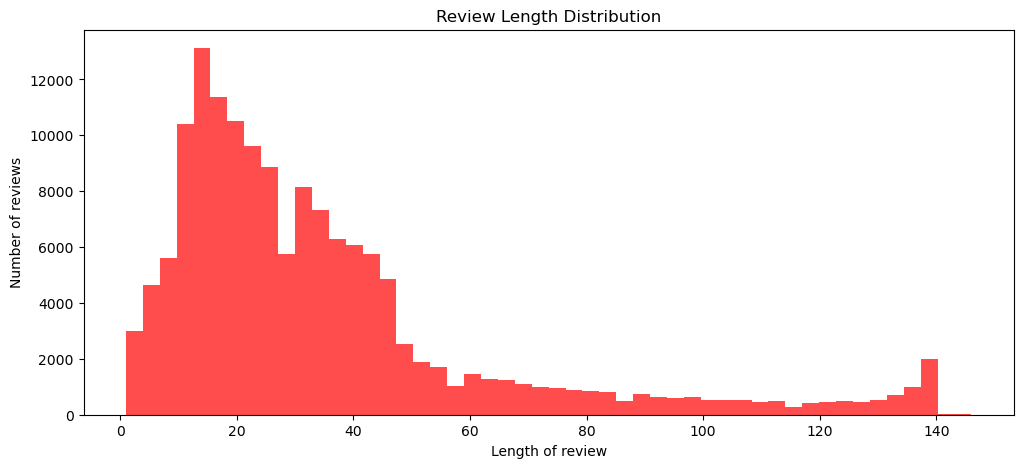

In [4]:

#====================================================================================
# 1-1. 코퍼스 분석
#====================================================================================
# 1) 리뷰 텍스트 길이 분포 확인
# 각 리뷰('document')의 길이를 계산하여 새로운 컬럼 'length'에 저장합니다.
train_data['length'] = train_data['document'].astype(str).apply(len)
print("리뷰 길이 최댓값: {}".format(np.max(train_data['length'])))
print("리뷰 길이 최솟값: {}".format(np.min(train_data['length'])))
print("리뷰 길이 평균값: {:.2f}".format(np.mean(train_data['length'])))

# 리뷰 길이 분포를 히스토그램으로 시각화합니다.
plt.figure(figsize=(12, 5))
plt.hist(train_data['length'], bins=50, alpha=0.7, color='r')
plt.title('Review Length Distribution')
plt.xlabel('Length of review')
plt.ylabel('Number of reviews')
plt.show()


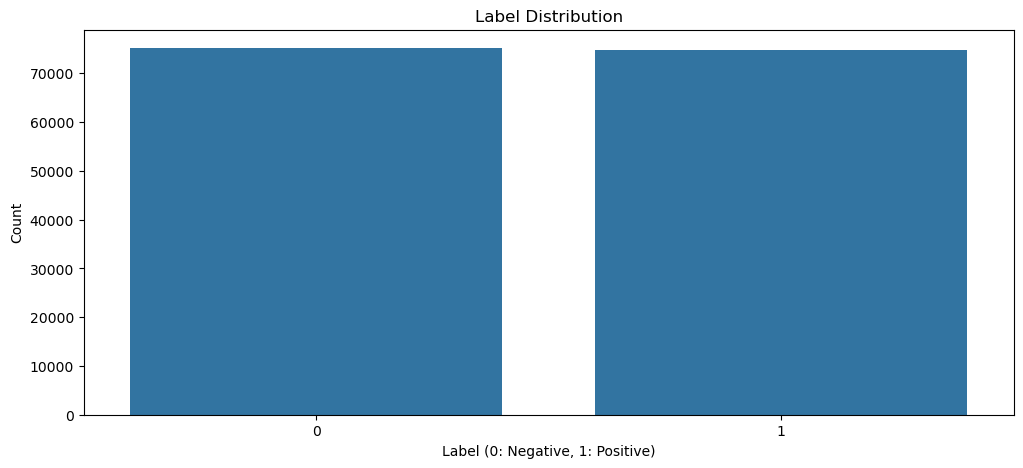

In [5]:
# 2) 긍정/부정 레이블 분포 확인
# 긍정(1)과 부정(0) 레이블의 개수를 계산하고 시각화하여 데이터의 균형을 확인합니다.
plt.figure(figsize=(12, 5))
sns.countplot(x='label', data=train_data)
plt.title('Label Distribution')
plt.xlabel('Label (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.show()

======= 긍정 리뷰 길이 통계 =======
count    74827.000000
mean        34.599115
std         28.680789
min          1.000000
25%         16.000000
50%         27.000000
75%         42.000000
max        146.000000
Name: length, dtype: float64

======= 부정 리뷰 길이 통계 =======
count    75173.000000
mean        35.805010
std         30.343805
min          1.000000
25%         16.000000
50%         27.000000
75%         43.000000
max        146.000000
Name: length, dtype: float64


/tmp/ipykernel_16571/2102391404.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_reviews['length'], label='Positive', shade=True)
/tmp/ipykernel_16571/2102391404.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(negative_reviews['length'], label='Negative', shade=True)


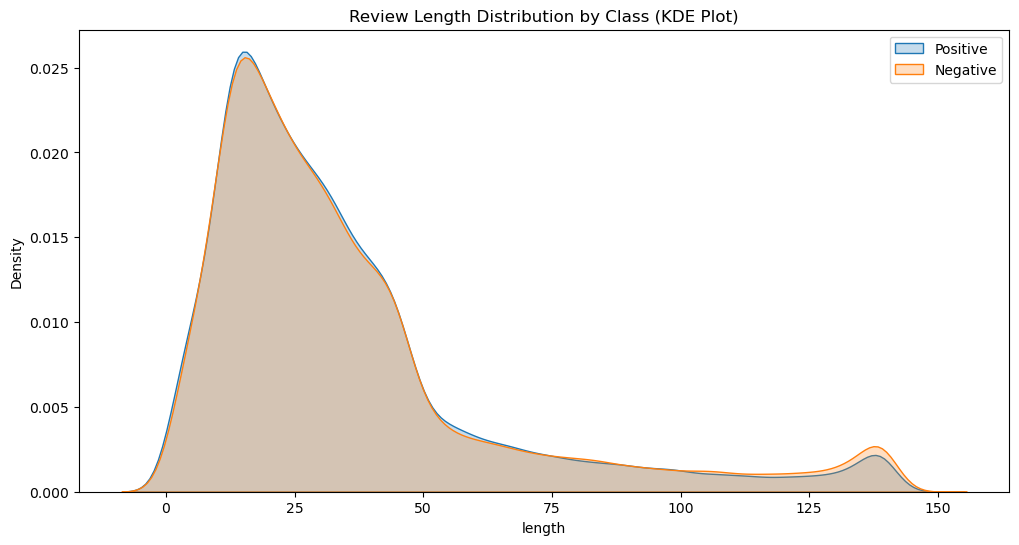

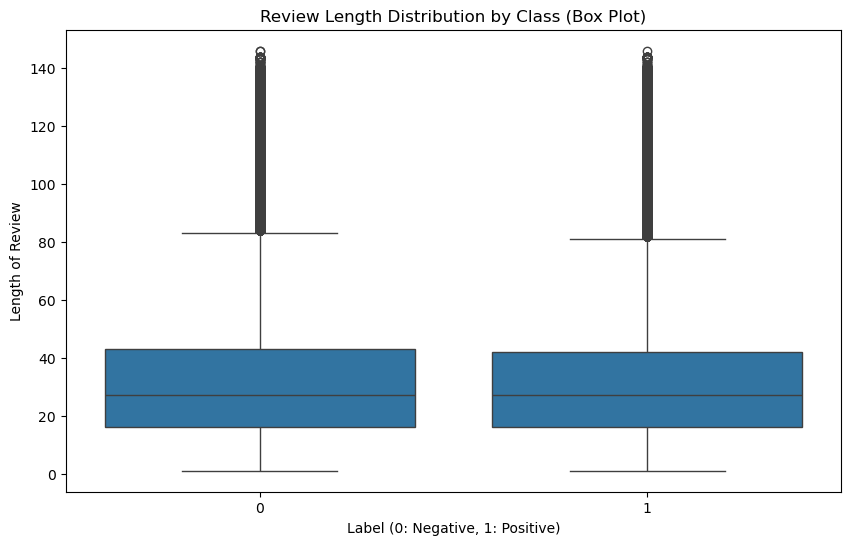

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# (이전 코드에서 train_data에 'length' 컬럼이 이미 생성되었다고 가정합니다.)

#====================================================================================
# 1. 클래스별 기술 통계량 비교
#====================================================================================
# label이 1인 (긍정) 데이터와 0인 (부정) 데이터를 분리합니다.
positive_reviews = train_data[train_data['label'] == 1]
negative_reviews = train_data[train_data['label'] == 0]

# 각 클래스별로 리뷰 길이('length')에 대한 기술 통계량을 출력합니다.
# describe() 함수는 개수(count), 평균(mean), 표준편차(std), 최솟값(min), 
# 4분위수(25%, 50%, 75%), 최댓값(max)을 한 번에 보여줍니다.
print("======= 긍정 리뷰 길이 통계 =======")
print(positive_reviews['length'].describe())
print("\n======= 부정 리뷰 길이 통계 =======")
print(negative_reviews['length'].describe())


#====================================================================================
# 2. 클래스별 분포 시각화
#====================================================================================
# 1) KDE 플롯으로 분포 비교
plt.figure(figsize=(12, 6))
plt.title('Review Length Distribution by Class (KDE Plot)')

# 긍정 리뷰와 부정 리뷰의 길이 분포를 KDE(Kernel Density Estimate) 그래프로 그립니다.
# KDE는 히스토그램을 부드러운 곡선 형태로 나타내어 분포를 비교하기 용이합니다.
sns.kdeplot(positive_reviews['length'], label='Positive', shade=True)
sns.kdeplot(negative_reviews['length'], label='Negative', shade=True)
plt.legend()
plt.show()

# 2) 박스 플롯으로 분포 비교
plt.figure(figsize=(10, 6))
plt.title('Review Length Distribution by Class (Box Plot)')

# 박스 플롯은 데이터의 중앙값, 4분위수, 이상치 등을 시각적으로 보여주어
# 두 그룹 간의 데이터 분포를 요약하여 비교하는 데 효과적입니다.
sns.boxplot(x='label', y='length', data=train_data)
plt.xlabel('Label (0: Negative, 1: Positive)')
plt.ylabel('Length of Review')
plt.show()

In [7]:
#====================================================================================
# 1-2. 데이터 전처리 (정제)
#====================================================================================
# 1) 결측치 제거
# 'document' 컬럼에 결측치(NaN)가 있는 행을 제거합니다.
print("결측치 제거 전:", len(train_data))
train_data.dropna(subset=['document'], inplace=True)
print("결측치 제거 후:", len(train_data))

# 2) 중복 데이터 제거
# 'document' 컬럼 기준으로 중복된 리뷰를 제거합니다.
print("중복 데이터 제거 전:", len(train_data))
train_data.drop_duplicates(subset=['document'], inplace=True)
print("중복 데이터 제거 후:", len(train_data))




결측치 제거 전: 150000
결측치 제거 후: 149995
중복 데이터 제거 전: 149995
중복 데이터 제거 후: 146182


In [8]:
#====================================================================================
# 1-3. 데이터셋 분리
#====================================================================================
# 훈련 데이터셋을 훈련(train)과 검증(validation) 데이터셋으로 분리합니다.
# 테스트 데이터는 이미 분리되어 있으므로, 훈련 데이터를 8:2 비율로 나눕니다.
# stratify=train_data['label'] 옵션은 원본 데이터의 긍정/부정 비율을 유지하며 분리하도록 합니다.
train_set, val_set = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data['label'])

print("훈련 데이터셋 개수:", len(train_set))
print("검증 데이터셋 개수:", len(val_set))
print("테스트 데이터셋 개수:", len(test_data))

훈련 데이터셋 개수: 116945
검증 데이터셋 개수: 29237
테스트 데이터셋 개수: 50000


In [10]:
!pip install tqdm

<>:113: SyntaxWarning: invalid escape sequence '\?'
<>:113: SyntaxWarning: invalid escape sequence '\.'
<>:113: SyntaxWarning: invalid escape sequence '\?'
<>:113: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_16571/1460234487.py:113: SyntaxWarning: invalid escape sequence '\?'
  symbols_to_find = ['ㅋ', 'ㅎ', 'ㅠ', 'ㅜ', '!', '\?','\.', '♡', '☆']
/tmp/ipykernel_16571/1460234487.py:113: SyntaxWarning: invalid escape sequence '\.'
  symbols_to_find = ['ㅋ', 'ㅎ', 'ㅠ', 'ㅜ', '!', '\?','\.', '♡', '☆']


======= 1. 단어 빈도 분석 =======

[긍정 리뷰 Top 10 단어]
[('영화', 10291), ('정말', 5674), ('너무', 4490), ('진짜', 3172), ('최고의', 2018), ('보고', 1630), ('ㅋㅋ', 1506), ('이런', 1470), ('영화를', 1457), ('최고', 1394)]

[부정 리뷰 Top 10 단어]
[('영화', 8590), ('너무', 4056), ('진짜', 3496), ('정말', 2836), ('그냥', 2647), ('이런', 2014), ('이건', 1658), ('영화는', 1476), ('없다', 1446), ('쓰레기', 1435)]


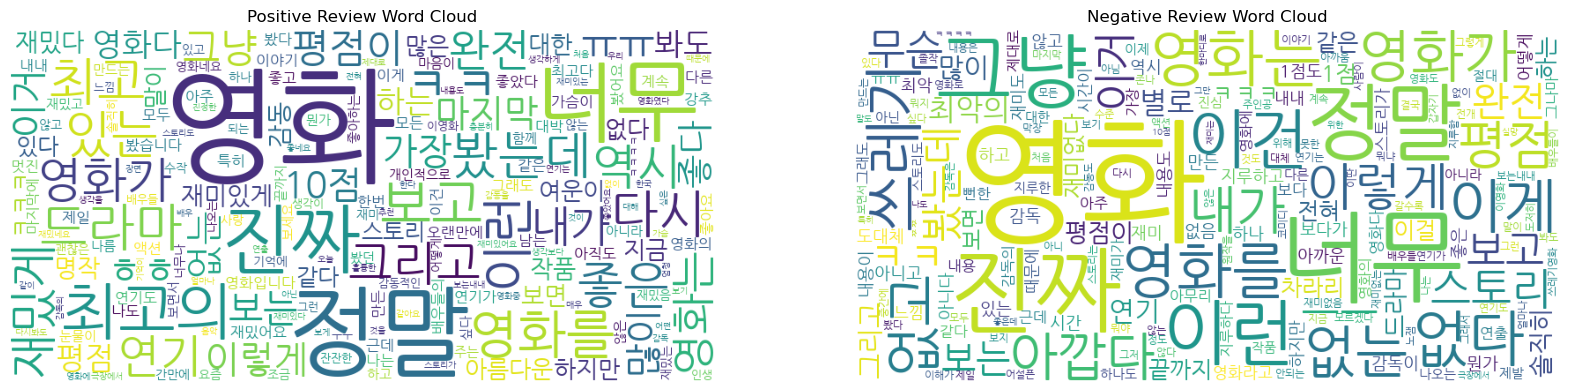



======= 2. 형태소 분석 (샘플 데이터) =======
시간이 오래 걸릴 수 있으니 잠시만 기다려주세요...

긍정 리뷰 형태소 분석 중...


  0%|          | 0/10000 [00:00<?, ?it/s]

부정 리뷰 형태소 분석 중...


  0%|          | 0/10000 [00:00<?, ?it/s]


[긍정 리뷰 Top 10 명사 (샘플)]
[('영화', 3535), ('정말', 821), ('최고', 796), ('진짜', 530), ('연기', 513), ('감동', 473), ('생각', 450), ('드라마', 420), ('평점', 378), ('보고', 345)]

[부정 리뷰 Top 10 명사 (샘플)]
[('영화', 3284), ('진짜', 580), ('평점', 505), ('스토리', 502), ('정말', 444), ('쓰레기', 439), ('그냥', 390), ('연기', 389), ('감독', 365), ('시간', 360)]

[긍정 리뷰 Top 10 형용사 (샘플)]
[('좋다', 1212), ('있다', 1056), ('재밌다', 1012), ('없다', 634), ('같다', 583), ('재미있다', 460), ('아니다', 384), ('이렇다', 277), ('이다', 254), ('괜찮다', 189)]

[부정 리뷰 Top 10 형용사 (샘플)]
[('없다', 1542), ('아니다', 678), ('있다', 675), ('아깝다', 565), ('같다', 546), ('좋다', 498), ('재미없다', 403), ('이렇다', 377), ('지루하다', 337), ('그렇다', 266)]


======= 3. 특수문자 및 기호 분석 =======

[긍정 리뷰 기호 빈도]
[('.', 102865), ('!', 23263), ('ㅋ', 17968), ('ㅠ', 6486), ('?', 5239), ('ㅎ', 4873), ('ㅜ', 1979), ('♡', 455), ('☆', 92)]

[부정 리뷰 기호 빈도]
[('.', 137099), ('ㅋ', 16903), ('?', 13150), ('!', 8138), ('ㅠ', 2456), ('ㅜ', 1054), ('ㅎ', 1051), ('♡', 51), ('☆', 19)]


======= 4. N-gram 분석 (Bigram) =======

[긍정 리뷰 Top 10

In [13]:
import pandas as pd
import re
from collections import Counter
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# (이전 단계에서 train_data가 로드 및 정제되었다고 가정합니다.)
train_data.dropna(subset=['document'], inplace=True)
train_data.drop_duplicates(subset=['document'], inplace=True)

# [수정] 긍정/부정 리뷰를 DataFrame과 리스트 형태로 분리
positive_df = train_data[train_data['label'] == 1]
negative_df = train_data[train_data['label'] == 0]

# 위에서 생성한 DataFrame을 사용하여 document 리스트를 생성
positive_docs = positive_df['document'].tolist()
negative_docs = negative_df['document'].tolist()

#====================================================================================
# 1. 단어 빈도 분석 (Word Frequency Analysis)
#====================================================================================
print("======= 1. 단어 빈도 분석 =======")
# CountVectorizer를 사용하여 단어 빈도를 계산 (띄어쓰기 기준)
vectorizer = CountVectorizer(min_df=5, max_features=1000) # 최소 5번 이상 등장한 단어 중 상위 1000개

# 긍정 리뷰
pos_word_counts = vectorizer.fit_transform(positive_docs)
pos_word_freq = sorted(zip(vectorizer.get_feature_names_out(), pos_word_counts.sum(axis=0).tolist()[0]), key=lambda x: x[1], reverse=True)
print("\n[긍정 리뷰 Top 10 단어]")
print(pos_word_freq[:10])

# 부정 리뷰
neg_word_counts = vectorizer.fit_transform(negative_docs)
neg_word_freq = sorted(zip(vectorizer.get_feature_names_out(), neg_word_counts.sum(axis=0).tolist()[0]), key=lambda x: x[1], reverse=True)
print("\n[부정 리뷰 Top 10 단어]")
print(neg_word_freq[:10])

# 워드 클라우드 시각화
# 한글 폰트 경로 설정 (Windows: 'c:/Windows/Fonts/malgun.ttf', Mac: '/Library/Fonts/AppleGothic.ttf')
# Colab, Linux 환경에서는 나눔 폰트 설치 후 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' 경로를 주로 사용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' 

pos_wc = WordCloud(font_path=font_path, background_color='white', width=800, height=400).generate_from_frequencies(dict(pos_word_freq))
neg_wc = WordCloud(font_path=font_path, background_color='white', width=800, height=400).generate_from_frequencies(dict(neg_word_freq))

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(pos_wc)
plt.title('Positive Review Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(neg_wc)
plt.title('Negative Review Word Cloud')
plt.axis('off')
plt.show()

#====================================================================================
# 2. 형태소 분석 (Morphological Analysis) - ✨ 샘플 데이터 사용
#====================================================================================
print("\n\n======= 2. 형태소 분석 (샘플 데이터) =======")
print("시간이 오래 걸릴 수 있으니 잠시만 기다려주세요...")

# [수정] 데이터가 너무 많으므로, 각 클래스에서 10,000건씩 샘플링하여 분석합니다.
sample_size = 10000
# 이제 positive_df, negative_df가 정상적으로 참조됩니다.
positive_docs_sample = positive_df.sample(n=sample_size, random_state=42)['document'].tolist()
negative_docs_sample = negative_df.sample(n=sample_size, random_state=42)['document'].tolist()
okt = Okt()

# 결과를 담을 빈 리스트 생성
pos_nouns, pos_adj = [], []
neg_nouns, neg_adj = [], []

# [수정] tqdm을 for문에 적용하여 진행률 표시
print("\n긍정 리뷰 형태소 분석 중...")
for doc in tqdm(positive_docs_sample):
    for word, tag in okt.pos(doc, stem=True):
        if tag == 'Noun' and len(word) > 1:
            pos_nouns.append(word)
        if tag == 'Adjective':
            pos_adj.append(word)

print("부정 리뷰 형태소 분석 중...")
for doc in tqdm(negative_docs_sample):
    for word, tag in okt.pos(doc, stem=True):
        if tag == 'Noun' and len(word) > 1:
            neg_nouns.append(word)
        if tag == 'Adjective':
            neg_adj.append(word)


print("\n[긍정 리뷰 Top 10 명사 (샘플)]")
print(Counter(pos_nouns).most_common(10))
print("\n[부정 리뷰 Top 10 명사 (샘플)]")
print(Counter(neg_nouns).most_common(10))

print("\n[긍정 리뷰 Top 10 형용사 (샘플)]")
print(Counter(pos_adj).most_common(10))
print("\n[부정 리뷰 Top 10 형용사 (샘플)]")
print(Counter(neg_adj).most_common(10))




#====================================================================================
# 3. 특수문자 및 기호 분석 (Special Characters & Symbols Analysis)
#====================================================================================
print("\n\n======= 3. 특수문자 및 기호 분석 =======")
symbols_to_find = ['ㅋ', 'ㅎ', 'ㅠ', 'ㅜ', '!', '\?','\.', '♡', '☆']

def count_symbols(docs, symbols):
    symbol_counts = Counter()
    for doc in docs:
        for symbol in symbols:
            found = re.findall(f'[{symbol}]+', doc) # 연속된 기호(ㅋㅋ, !!!)도 1개로 카운트하지 않고 모두 찾기 위함
            if found:
                symbol_counts.update(found)
    return symbol_counts

print("\n[긍정 리뷰 기호 빈도]")
print(Counter("".join(re.findall(f"[{''.join(symbols_to_find)}]", " ".join(positive_docs)))).most_common(10))

print("\n[부정 리뷰 기호 빈도]")
print(Counter("".join(re.findall(f"[{''.join(symbols_to_find)}]", " ".join(negative_docs)))).most_common(10))


#====================================================================================
# 4. N-gram 분석 (N-gram Analysis, Bigram 예시)
#====================================================================================
print("\n\n======= 4. N-gram 분석 (Bigram) =======")
# ngram_range=(2, 2)는 bigram만 추출하라는 의미
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=5)

# 긍정 리뷰
pos_bigram_counts = bigram_vectorizer.fit_transform(positive_docs)
pos_bigram_freq = sorted(zip(bigram_vectorizer.get_feature_names_out(), pos_bigram_counts.sum(axis=0).tolist()[0]), key=lambda x: x[1], reverse=True)
print("\n[긍정 리뷰 Top 10 Bigram]")
print(pos_bigram_freq[:10])

# 부정 리뷰
neg_bigram_counts = bigram_vectorizer.fit_transform(negative_docs)
# [수정] 'neg_bigram_vectorizer' -> 'bigram_vectorizer'
neg_bigram_freq = sorted(zip(bigram_vectorizer.get_feature_names_out(), neg_bigram_counts.sum(axis=0).tolist()[0]), key=lambda x: x[1], reverse=True)
print("\n[부정 리뷰 Top 10 Bigram]")
print(neg_bigram_freq[:10])

In [14]:
# (이전 코드에서 pos_word_freq, neg_word_freq가 생성되었다고 가정합니다.)

# 1. 각 클래스별 상위 100개 단어를 set 자료형으로 변환
top_n = 100
pos_words_set = set([word for word, freq in pos_word_freq[:top_n]])
neg_words_set = set([word for word, freq in neg_word_freq[:top_n]])

# 2. 공통으로 등장하는 단어(교집합) 찾기
common_words = pos_words_set.intersection(neg_words_set)

# 3. 각 클래스에서 공통 단어를 제외한 고유 단어(차집합) 찾기
unique_pos_words = pos_words_set.difference(common_words)
unique_neg_words = neg_words_set.difference(common_words)

# 4. 결과 출력
print(f"======= 상위 {top_n}개 단어 비교 분석 =======")
print(f"\n[공통 단어 ({len(common_words)}개)]")
print(sorted(list(common_words)))

print(f"\n[긍정 리뷰 고유 단어 ({len(unique_pos_words)}개)]")
print(sorted(list(unique_pos_words)))

print(f"\n[부정 리뷰 고유 단어 ({len(unique_neg_words)}개)]")
print(sorted(list(unique_neg_words)))

======= 상위 100개 단어 비교 분석 =======

[공통 단어 (46개)]
['ㅋㅋ', 'ㅋㅋㅋ', 'ㅠㅠ', '가장', '같다', '같은', '그냥', '그래도', '그리고', '근데', '내가', '내내', '너무', '드라마', '만든', '많이', '보고', '보는', '보면', '봤는데', '스토리', '아주', '없는', '없다', '역시', '연기', '영화', '영화가', '영화는', '영화다', '영화를', '영화의', '완전', '이거', '이건', '이게', '이런', '이렇게', '있는', '정말', '좋은', '진짜', '평점', '평점이', '하는', '하지만']

[긍정 리뷰 고유 단어 (54개)]
['10점', 'ㅎㅎ', '가슴이', '감동', '강추', '개인적으로', '계속', '나는', '나도', '나름', '남는', '다른', '다시', '대박', '대한', '마지막', '마지막에', '많은', '말이', '멋진', '명작', '모두', '모든', '배우들의', '봐도', '봤다', '봤습니다', '봤어요', '아름다운', '아직도', '액션', '여운이', '연기가', '연기도', '영화입니다', '오랜만에', '이야기', '있다', '작품', '재미있게', '재밌게', '재밌다', '재밌어요', '제일', '좋고', '좋다', '좋아요', '좋았다', '지금', '최고', '최고다', '최고의', '특히', '한번']

[부정 리뷰 고유 단어 (54개)]
['1점', '1점도', 'ㅡㅡ', '감독', '감독의', '감독이', '그나마', '끝까지', '나오는', '내용', '내용도', '내용이', '느낌', '도대체', '때문에', '무슨', '뭔가', '별로', '보다', '보다가', '뻔한', '솔직히', '스토리가', '시간', '시간이', '쓰레기', '아까운', '아깝다', '아니고', '아니다', '아니라', '아무리', '않고', '어떻게', '없고', '없음', '연출', '영화라고', '영화에'

## 1. 단어 빈도 분석 인사이트
공통 단어의 중의성 및 문맥 의존성: '영화', '너무', '진짜'뿐만 아니라, **'좋은', '없는', '없다', '같다'**와 같이 감정을 나타낼 수 있는 단어들도 공통 단어 리스트에 포함됨. 이는 단어 하나만으로는 감정을 완벽히 판단할 수 없음. 예를 들어, '지루할 틈이 없는 영화'(긍정)와 '내용이 없는 영화'(부정)처럼, '없다'라는 단어의 긍/부정 의미는 주변 단어에 의해 결정됨.

고유 단어를 통한 명확한 감정 구분: 공통 단어를 제거하자 각 클래스의 특징이 훨씬 선명해짐.

긍정 고유 단어: '감동', '강추', '명작', '여운이', '아름다운', '재밌다', '최고' 등 긍정적인 감상과 경험에 집중된 단어들 확인.

부정 고유 단어: '최악', '쓰레기', '아깝다', '재미없다', '지루하다' 등 직설적인 부정 표현과 '1점도', '시간이' 처럼 가치 판단에 대한 단어들이 주를 이룸.

시사점: 공통 단어 리스트에 있는 46개 단어는 감정 판별에 혼란을 줄 수 있으므로, 사용자 정의 불용어(custom stopword) 목록에 넣는 것도 고려해볼 수 있음.  


## 2. 형태소 분석 인사이트 🧐
명사: 부정 리뷰의 고유 명사에는 '감독', '내용', '스토리', '연출' 등 영화의 구성 요소를 직접적으로 지적하는 단어들 확인. 반면 긍정 고유 명사에는 **'감동', '여운이', '작품'**처럼 영화 전체에 대한 감상과 평가 확인, 부정 리뷰가 긍정 리뷰보다 분석적이고 구체적인 비판 경향을 보임.

형용사: 감정의 핵심! 고유 단어 리스트는 형용사가 감정 분류의 핵심 피처로 보임. **긍정 고유 단어 리스트의 '아름다운', '재밌다'**와 **부정 고유 단어 리스트의 '아깝다', '지루하다'**는 그 자체로 명확한 긍정/부정 레이블 역할을 함.

## 3. 특수문자 및 기호 분석 인사이트
공통 단어 분석을 통해 일부 기호의 중의성이 발견됨.

**'ㅋㅋ', 'ㅋㅋㅋ', 'ㅠㅠ'**는 공통 단어에 포함되어, 긍정과 부정 상황 모두에서 사용될 수 있는 중립적인 감정 표현임. (예: 어이없을 때 웃는 'ㅋㅋ', 감동의 눈물 'ㅠㅠ')

하지만 **'ㅎㅎ'(긍정 고유)와 'ㅡㅡ'(부정 고유)**처럼 특정 감정에만 사용되는 명확한 신호도 존재.

시사점: 기호들은 중요한 피처이므로 데이터 전처리에서 제거하지 않는 것을 고려. 다만 일부 기호는 단독으로보다 다른 단어와 함께 나타날 때(N-gram) 더 정확한 의미를 가질 수 있음.

## 4. N-gram 분석 인사이트 ✍️
Bigram으로 문맥 의존성 해결: 단어 빈도 분석에서 '없다', '좋은'과 같은 단어가 왜 공통 단어인지 N-gram으로 확인 할 수 있음.

"재미도 없고"(부정) vs "흠잡을 데 없는"(긍정)

"좋은 배우를 데리고..."(부정) vs "좋은 영화"(긍정)

N-gram은 단어의 문맥적 의미를 포착하여 중의성을 해결할 수 있음.

시사점: 공통 단어의 존재와 중의성 문제를 해결하기 위해, 단일 단어(1-gram)와 Bigram(2-gram)을 함께 사용하는 것이 모델 성능 향상 도움이 될 듯.

In [ ]:
**전략의 핵심은 "감정 신호는 최대한 보존하고, 중립적인 노이즈는 제거하며, 
한국어의 특성과 데이터의 특징을 모두 고려한 토크나이저를 찾는 것"**일까?.

## 1. 전처리(Preprocessing) 전략
분석 결과에 따르면, 무조건적인 정제는 오히려 모델 성능을 해칠 수 있음. 
선택적이고 목적이 분명한 전처리를 수행.

반드시 유지해야 할 요소 (Keep):

감정 기호 및 이모티콘: !, ?, ㅋ, ㅎ, ㅠ, ㅜ, ♡, ☆, ㅎㅎ, ㅡㅡ 등은 
감정을 표현하는 강력한 신호이므로 제거하지 않음.

숫자: '10점', '1점도'와 같이 평점을 나타내는 숫자는 긍/부정을 나누는 결정적 단어이므로 유지.

제거를 고려해야 할 요소 (Remove):

사용자 정의 불용어(Custom Stopwords): 공통 단어 분석에서 확인된 46개의 단어  
('영화', '너무', '정말', '진짜', '이런' 등)를 우선적인 불용어 리스트로 지정. 



## 2. 토크나이저(Tokenizer) 선정 및 비교
어떤 토크나이저가 우리 데이터의 특징을 가장 잘 학습하는지 비교 검증하는 과정이 필요합니다.

기본(Baseline) 토크나이저: KoNLPy 형태소 분석기 (예: Mecab 또는 Okt)

선정 이유: EDA를 통해 명사와 형용사가 감정 분석의 핵심임을 확인. 
형태소 분석기는 품사 정보를 활용하여 단어의 원형을 복원하고, 
의미 단위로 분리하는 데 매우 효과적이므로 가장 강력한 베이스라인이 될 수 있음.

비교(Comparison) 토크나이저: SentencePiece (Subword Tokenizer)

선정 이유:
신조어 및 오타 대응: '존잼', '노잼'과 같은 신조어나 오타를 의미 있는 조각(subword)으로 분리하여 
처음 보는 단어(OOV) 문제에 강건함.

데이터 기반: 통계적으로 데이터에서 자주 나타나는 패턴을 학습하므로, 
우리 데이터셋의 고유한 특성(예: 기호, 자음 표현)을 토큰에 반영할 수 있음.

형태소 분석기와 서브워드 토크나이저의 성능을 비교하여 
어떤 방식이 영화 리뷰 감정 분류에 더 적합한지 판단 필요.

## 3. SentencePiece 옵션 변경 고려사항
SentencePiece 토크나이저를 학습시킬 때, EDA 인사이트를 다음과 같이 옵션에 반영할 수 있음.

-vocab_size	8000 ~ 16000 사이에서 시작	
리뷰 텍스트가 비교적 짧고, 핵심 어휘가 반복되는 경향이 있으므로 너무 큰 사전은 불필요할 수 있음.  
하이퍼파라미터로 조정하며 최적값을 찾는다.  
    
-character_coverage	1.0	'ㅋ', '!', '♡' 등 모든 기호와 이모티콘을 단어 사전에 포함시키기 위함입니다. 
기본값(0.9995)은 드물게 나타나는 문자를 제외할 수 있으므로 1.0으로 설정하여 모든 정보를 보존합니다.  
   
-user_defined_symbols	ㅋㅋ, ㅎㅎ, ㅠㅠ, ㅡㅡ, !, ?	등 옵션에 자주 쓰이는 기호들을 등록하면, 
SentencePiece가 이들을 하나의 의미 있는 단위(토큰)로 취급할 수 있음. 
'ㅋㅋ'가 'ㅋ', 'ㅋ'로 분리되는 것을 방지하여 감정 신호를 그대로 유지할 수 있음.

-model_type	unigram (또는 bpe와 비교)	unigram은 통계적으로 여러 토큰화 후보를 만들어내므로, 
모델이 좀 더 강건한 표현을 학습하는 데 도움이 될 수 있음. 
bpe는 가장 표준적인 방식이므로 두 모델의 성능을 비교해 볼 가치가 있음.